In [75]:
import tensorflow as tf

In [76]:
TRAIN_DIR = "./dataset/train"
VAL_DIR = "./dataset/validation"
TEST_DIR = "./dataset/test"

IMG_SIZE = (64, 64)

In [77]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


preprocessing_function=tf.keras.applications.resnet50.preprocess_input
train_datagen = ImageDataGenerator(preprocessing_function=preprocessing_function)
val_datagen = ImageDataGenerator(preprocessing_function=preprocessing_function)
test_datagen = ImageDataGenerator(preprocessing_function=preprocessing_function)


BATCH_SIZE = 256
train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                    batch_size = BATCH_SIZE,
                                                    class_mode = 'binary',
                                                    target_size = IMG_SIZE)

validation_generator = val_datagen.flow_from_directory(VAL_DIR,
                                                       batch_size = BATCH_SIZE,
                                                       class_mode = 'binary',
                                                       target_size = IMG_SIZE)


test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  batch_size = BATCH_SIZE,
                                                  class_mode = 'binary',
                                                  target_size = IMG_SIZE)

Found 19999 images belonging to 2 classes.
Found 3999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [78]:
base_model = tf.keras.applications.resnet50.ResNet50(include_top=False,
                                                    weights="imagenet",
                                                    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

model = tf.keras.Sequential([
    base_model,

    tf.keras.layers.GlobalAveragePooling2D(),

    tf.keras.layers.Dense(1000, activation='relu'),

    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

for layer in base_model.layers:
    layer.trainable = False


model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 global_average_pooling2d_13  (None, 2048)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_26 (Dense)            (None, 1000)              2049000   
                                                                 
 batch_normalization_13 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dense_27 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 25,641,713
Trainable params: 2,052,001


In [79]:
optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [80]:
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, min_lr=1e-6)
early_stop_callback = tf.keras.callbacks.EarlyStopping(patience=15)
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    batch_size=BATCH_SIZE,
                    epochs=200,
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator),
                    callbacks=[lr_callback, early_stop_callback])

Epoch 1/200


2024-02-27 00:48:15.648283: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-02-27 00:48:16.690611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


79/79 [==============================] - ETA: 0s - loss: 0.3588 - accuracy: 0.8406

2024-02-27 00:49:04.315244: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-02-27 00:49:05.259871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


79/79 [==============================] - 71s 769ms/step - loss: 0.3588 - accuracy: 0.8406 - val_loss: 0.3297 - val_accuracy: 0.8597 - lr: 0.1000
Epoch 2/200
79/79 [==============================] - 40s 501ms/step - loss: 0.3030 - accuracy: 0.8636 - val_loss: 0.2904 - val_accuracy: 0.8760 - lr: 0.1000
Epoch 3/200
79/79 [==============================] - 41s 522ms/step - loss: 0.2899 - accuracy: 0.8745 - val_loss: 0.3228 - val_accuracy: 0.8575 - lr: 0.1000
Epoch 4/200
79/79 [==============================] - 42s 534ms/step - loss: 0.2792 - accuracy: 0.8785 - val_loss: 0.3059 - val_accuracy: 0.8665 - lr: 0.1000
Epoch 5/200
79/79 [==============================] - 42s 527ms/step - loss: 0.2798 - accuracy: 0.8773 - val_loss: 0.2894 - val_accuracy: 0.8720 - lr: 0.1000
Epoch 6/200
79/79 [==============================] - 41s 529ms/step - loss: 0.2737 - accuracy: 0.8801 - val_loss: 0.3043 - val_accuracy: 0.8667 - lr: 0.1000
Epoch 7/200
79/79 [==============================] - 45s 565ms/step - 

In [81]:
import matplotlib.pyplot as plt
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

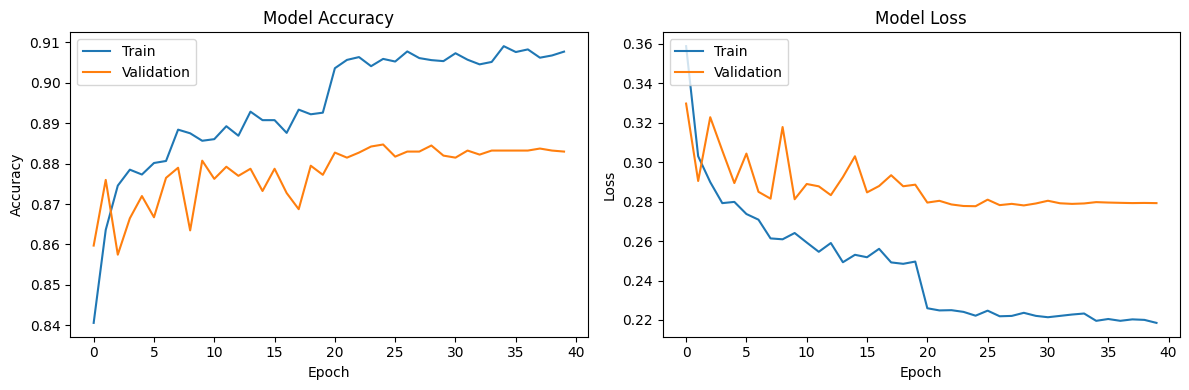

In [82]:
plot_history(history=history)

In [83]:
score = model.evaluate_generator(validation_generator, steps=len(validation_generator))

/var/folders/rh/j46lc71j5qv4m38j7qglyclr0000gn/T/ipykernel_86727/557876592.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(validation_generator, steps=len(validation_generator))
2024-02-27 01:32:40.550373: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


In [84]:
score

[0.27922385931015015, 0.8829707503318787]